In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [3]:
####################################################################################################
# pre-process

original_csv_links = [
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub2_1665156140.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub3_1665169118.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub4_1665171433.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub5_1665177450.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub6_1665181701.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub7_1665429371.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub8_1665435287.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub9_1665447708.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub10_1665494513.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub11_1665499310.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub12_1665522669.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub13_1665531443.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub14_1665584720.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub15_1665591432.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub16_1665620373.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub17_1665623547.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub18_1665671006.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub19_1665677719.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub20_1665682149.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub21_1665688623.csv",
    "/Users/maslychm/projects/vr_selection/Assets/StreamingAssets/density_data/sr_sub22_1665701569.csv",
]

assert len(original_csv_links) == len(list(set(original_csv_links)))

csv_root = "/Users/maslychm/projects/vr_selection/density_data/"
processed_csv_links = []
for link in original_csv_links:
    df = pd.read_csv(link)
    df["global_trial_idx"] = pd.Series(range(1, 121))
    
    sub_idx = link.split("sub")[-1].split("_")[0]
    # print(sub_idx)
    processed_csv_link = csv_root + "sub_" + sub_idx + ".csv"
    df.to_csv(processed_csv_link, index=False)
    processed_csv_links.append(processed_csv_link)

del df

####################################################################################################
# load data

dataframes = [pd.read_csv(link) for link in processed_csv_links]
dfs = pd.concat(dataframes)

# drop trials where number of attemps is more than 1
# dfs = dfs[dfs["num_attempts"] == 1]

## TODO REMOVE ALL FIRST TRIALS PER TECHNIQUE

# drop rows where trial_time is over 20
# dfs = dfs[dfs["trial_time"] < 23]

# drop above 3 sdtev
# dfs = dfs[dfs["trial_time"] < dfs["trial_time"].mean() + 3 * dfs["trial_time"].std()]

dfs = dfs.reset_index()

# pre-process global trial index: mod global_trial_idx by 31
# dfs["global_trial_idx"] = dfs["global_trial_idx"] % 31

print(f"Number of rows: {len(dfs)}")


Number of rows: 2520


In [ ]:
# # count number of trials with more than 1 attempt per condition
# for technique in dfs.technique.unique():
#     for trial_type in dfs.trial_type.unique():
        
#         # num attempts above 1
#         more_attempts_df = dfs[(dfs["technique"] == technique) & (dfs["trial_type"] == trial_type)]
#         more_attempts_df = more_attempts_df[more_attempts_df["num_attempts"] > 1]["num_attempts"]
#         print(technique, trial_type, more_attempts_df.count())

In [4]:
order = [
    ["Flower", "ConeExpand"],
    ["OhMiniMap", "2DMiniMap+"],
    ["ThreeDMiniMap", "3DMiniMap"],
    ["GravityZone", "GravityZone"],
]

In [5]:
dfs.groupby(
    [
        # "subject_id", 
        "technique",
        "trial_type"
    ]
)[[
    "trial_time", 
    # "num_attempts"
]].mean()#.plot.bar()

pass

In [6]:
# ax = sns.catplot(data=dfs, x="trial_type", y="trial_time", col="technique", kind="violin", showfliers=False)

In [7]:
# ax = sns.catplot(data=dfs, hue="trial_type", x="technique", y="trial_time", col="density", kind="box", showfliers=False)

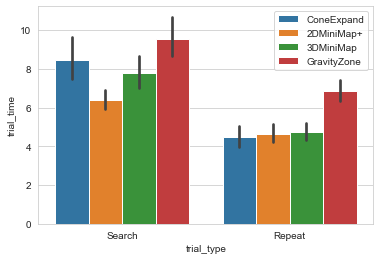

In [8]:
# ax = sns.barplot(data=dfs, x="trial_type", y="trial_time", hue="technique", order=[o[0] for o in techniques_order])
ax = sns.barplot(
    data=dfs, 
    x="trial_type", 
    y="trial_time", 
    hue="technique", 
    hue_order=[o[0] for o in order],
    order=["Search", "Repeat"],
    ci=95,
)
ax.legend(loc="lower left")

# set the hue labels
handles, labels = ax.get_legend_handles_labels()
labels = [o[1] for o in order]
ax.legend(handles=handles[:], labels=labels[:])

# ax = sns.violinplot(data=dfs, x="trial_type", y="trial_time", hue="technique")

In [ ]:
# ax = sns.histplot(data=dfs, x="trial_time", hue="trial_type", multiple="stack", bins=100)

In [ ]:
# distance to object to trial time
# ax = sns.lmplot(x="distance_to_obj", y="trial_time", data=dfs, hue="technique")

# split by trial type
# ax = sns.lmplot(x="distance_to_obj", y="trial_time", data=dfs, hue="technique", col="trial_type")

ax = sns.lmplot(x="global_trial_idx", y="trial_time", data=dfs, col="trial_type", hue="technique")

# ax = sns.lineplot(x="global_trial_idx", y="trial_time", data=dfs, hue="trial_type")

In [ ]:
# dfs.groupby(["technique", "trial_type"])[[
#     "trial_time", 
#     "num_attempts",
#     # "left_hand_distance_travelled", 
#     # "right_hand_distance_travelled"
# ]].mean()

In [ ]:
# dfs.columns.unique()

In [ ]:
# cleandf = dfs[dfs["trial_time"] < 30]

In [ ]:
# sns.histplot(data=cleandf, x="trial_time", hue="trial_type", multiple="stack", bins=20)

In [ ]:
# grouped_means = dfs.groupby(
#     [
#         "subject_id",
#         "technique",
#         "trial_type"
#     ]
# )[[
#     "trial_time",
#     "num_attempts",
#     "technique",
#     "trial_type",
#     # "left_hand_distance_travelled",
#     # "right_hand_distance_travelled"
# ]].mean()

# print(len(grouped_means))

In [ ]:
# ax = sns.lmplot(data=dfs, x="density", y="trial_time", hue="technique", col="trial_type")

In [ ]:
# single_attempt_dfs = dfs[dfs["num_attempts"] == 1]
# print(len(single_attempt_dfs))

In [ ]:
# ax = sns.barplot(
#     data=single_attempt_dfs, 
#     x="trial_type", 
#     y="trial_time", 
#     hue="technique", 
#     hue_order=[o[0] for o in order],
# )

In [9]:
# remove outliers per-techique per-trial-type

dfs_no_outliers_per_condition = pd.DataFrame()

for technique in dfs.technique.unique():
    tdfs = dfs[dfs["technique"] == technique]

    for trial_type in tdfs.trial_type.unique():
        ttdfs = tdfs[tdfs["trial_type"] == trial_type]

        # drop outliers which are above 3 standard deviations for trial time
        cleandfs = ttdfs[ttdfs["trial_time"] < ttdfs["trial_time"].mean() + 3 * ttdfs["trial_time"].std()]

        dfs_no_outliers_per_condition = pd.concat([dfs_no_outliers_per_condition, cleandfs])

print(len(dfs_no_outliers_per_condition))

print("diff = ", len(dfs) - len(dfs_no_outliers_per_condition))

2469
diff =  51


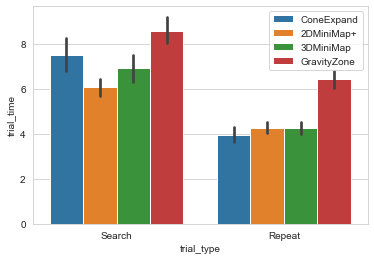

In [10]:
ax = sns.barplot(
    data=dfs_no_outliers_per_condition, 
    x="trial_type", 
    y="trial_time", 
    hue="technique", 
    hue_order=[o[0] for o in order],
    order=["Search", "Repeat"],
    ci=95,
)
ax.legend(loc="lower left")

# set size of plot
# fig = plt.gcf()
# fig.set_size_inches(10, 6)

# set the hue labels
handles, labels = ax.get_legend_handles_labels()
labels = [o[1] for o in order]
ax.legend(handles=handles[:], labels=labels[:])

In [ ]:
dfs_no_outliers_per_condition.groupby(["technique"])["trial_time"].mean()

In [11]:
# organize data: rows are partcipants, colums are conditions

condensed_df = pd.DataFrame()

for subject in dfs_no_outliers_per_condition.subject_id.unique():
    sdfs = dfs_no_outliers_per_condition[dfs_no_outliers_per_condition["subject_id"] == subject]

    # subject_row = dict()
    # subject_row["subject_id"] = subject

    for technique in sdfs.technique.unique():
        tdfs = sdfs[sdfs["technique"] == technique]

        for trial_type in tdfs.trial_type.unique():
            ttdfs = tdfs[tdfs["trial_type"] == trial_type]

            condition_row = dict()
            condition_row["technique"] = technique
            condition_row["trial_type"] = trial_type
            condition_row[f"trial_time"] = ttdfs["trial_time"].mean()
            # subject_row[f"{technique}_{trial_type}_mean_num_attempts"] = ttdfs["num_attempts"].mean()
            # subject_row[f"{technique}_{trial_type}_mean_left_hand_distance_travelled"] = ttdfs["left_hand_distance_travelled"].mean()
            # subject_row[f"{technique}_{trial_type}_mean_right_hand_distance_travelled"] = ttdfs["right_hand_distance_travelled"].mean()
    
            condensed_df = pd.concat([condensed_df, pd.DataFrame(condition_row, index=[0])])

condensed_df.to_csv("condensed_df.csv", index=False)


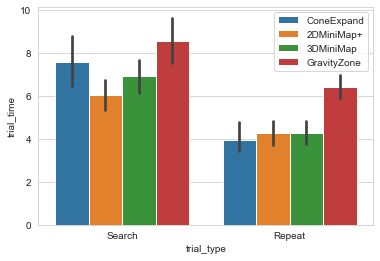

In [13]:
# plot condensed data
ax = sns.barplot(
    data=condensed_df, 
    x="trial_type", 
    y="trial_time", 
    hue="technique", 
    hue_order=[o[0] for o in order], 
    order=["Search", "Repeat"], 
    ci=95,
)

ax.legend(loc="lower left")

# set the hue labels
handles, labels = ax.get_legend_handles_labels()
labels = [o[1] for o in order]
ax.legend(handles=handles[:], labels=labels[:])

In [ ]:
# columns: technique, trial_type, trial_time

In [ ]:
# from bioinfokit.analys import stat

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
# perform two-way ANOVA
model = ols('trial_time ~ C(technique) + C(trial_type) + C(technique):C(trial_type)', data=condensed_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(technique),133.935380,3.0,12.833581,1.476563e-07
C(trial_type),271.652201,1.0,78.088493,1.684504e-15
C(technique):C(trial_type),19.932964,3.0,1.909961,1.300968e-01
Residual,556.603805,160.0,NaN,NaN


In [ ]:
# # just the cone and 2d
# cone_2d_df = dfs_no_outliers_per_condition[dfs_no_outliers_per_condition["technique"].isin(["Flower", "OhMiniMap"])]
# print(len(cone_2d_df))

# # perform two-way ANOVA
# model = ols('trial_time ~ C(technique) + C(trial_type) + C(technique):C(trial_type)', data=cone_2d_df).fit()
# sm.stats.anova_lm(model, typ=2)

In [ ]:
# # just the cone and 2d for search
# cone_2d_df = dfs_no_outliers_per_condition[dfs_no_outliers_per_condition["technique"].isin(["Flower", "OhMiniMap"])]
# cone_2d_df_search = cone_2d_df[cone_2d_df["trial_type"] == "Search"]
# print(len(cone_2d_df_search))

# # perform two-way ANOVA
# model = ols('trial_time ~ C(technique)', data=cone_2d_df_search).fit()
# sm.stats.anova_lm(model, typ=1)

In [ ]:
# # same test with 3d vs flower
# cone_3d_df = dfs_no_outliers_per_condition[dfs_no_outliers_per_condition["technique"].isin(["Flower", "ThreeDMiniMap"])]
# cone_3d_df_search = cone_3d_df[cone_3d_df["trial_type"] == "Search"]
# print(len(cone_3d_df_search))

# model = ols('trial_time ~ C(technique)', data=cone_3d_df_search).fit()
# sm.stats.anova_lm(model, typ=1)

In [ ]:
# rows are participants

# technique trial_type trial_time
# 
# 
# 

In [16]:
# stuff with condensed DF
condensed_cone_2d_df = condensed_df[condensed_df["technique"].isin(["Flower", "OhMiniMap"])]
# condensed_cone_2d_df_search = condensed_cone_2d_df[condensed_cone_2d_df["trial_type"] == "Search"]
# print(len(condensed_cone_2d_df_search))

# model = ols('trial_time ~ C(technique)', data=condensed_cone_2d_df_search).fit()
# sm.stats.anova_lm(model, typ=1)

# perform two-way ANOVA
model = ols('trial_time ~ C(technique) + C(trial_type) + C(technique):C(trial_type)', data=condensed_cone_2d_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(technique),7.898904,1.0,2.201082,1.418431e-01
C(trial_type),151.765784,1.0,42.290552,6.280377e-09
C(technique):C(trial_type),17.554529,1.0,4.891687,2.983927e-02
Residual,287.091614,80.0,NaN,NaN


In [17]:
# stuff with condensed DF
condensed_cone_2d_df = condensed_df[condensed_df["technique"].isin(["Flower", "ThreeDMiniMap"])]
# condensed_cone_2d_df_search = condensed_cone_2d_df[condensed_cone_2d_df["trial_type"] == "Search"]
# print(len(condensed_cone_2d_df_search))

# model = ols('trial_time ~ C(technique)', data=condensed_cone_2d_df_search).fit()
# sm.stats.anova_lm(model, typ=1)

# perform two-way ANOVA
model = ols('trial_time ~ C(technique) + C(trial_type) + C(technique):C(trial_type)', data=condensed_cone_2d_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(technique),0.712760,1.0,0.183749,6.693233e-01
C(trial_type),206.225698,1.0,53.164704,1.944525e-10
C(technique):C(trial_type),4.616386,1.0,1.190098,2.785846e-01
Residual,310.319718,80.0,NaN,NaN


In [18]:
# 3d vs gravity
gravity_3d_df = condensed_df[condensed_df["technique"].isin(["ThreeDMiniMap", "GravityZone"])]
print(len(gravity_3d_df))

# perform two-way ANOVA
model = ols('trial_time ~ C(technique) + C(trial_type) + C(technique):C(trial_type)', data=gravity_3d_df).fit()
sm.stats.anova_lm(model, typ=2)

84


,sum_sq,df,F,PR(>F)
C(technique),77.039364,1.0,22.867793,7.781747e-06
C(trial_type),120.770548,1.0,35.848634,5.762183e-08
C(technique):C(trial_type),1.494304,1.0,0.443558,5.073260e-01
Residual,269.512190,80.0,NaN,NaN
